In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import itertools
from matplotlib import pyplot as plt

import sklearn
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder

import spacy

import warnings
warnings.filterwarnings('ignore')

/Users/yutasugiyama/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.25.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


### Import Dataset

In [2]:
# Import dataset
data = pd.read_csv("DatabreachesMA2007_2022.csv")
df = pd.DataFrame(data)

### Statistics

In [3]:
# Only numerical column
numerical_columns = df[["MA Residents Affected"]]

# Calculations
minimum = numerical_columns.min()
maximum = numerical_columns.max()
mean = numerical_columns.mean()
median = numerical_columns.median()
std_deviation = numerical_columns.std()


stat_table = pd.DataFrame({
    'Statistic': ['Minimum', 'Maximum', 'Mean', 'Median', 'Standard Deviation'],
    "MA Residents Affected": [minimum["MA Residents Affected"], maximum["MA Residents Affected"], mean["MA Residents Affected"], median["MA Residents Affected"], std_deviation["MA Residents Affected"]]
})

stat_table

,Statistic,MA Residents Affected
0,Minimum,0.000000e+00
1,Maximum,2.982421e+06
2,Mean,7.149007e+02
3,Median,3.000000e+00
4,Standard Deviation,2.419799e+04


### Plot of Data

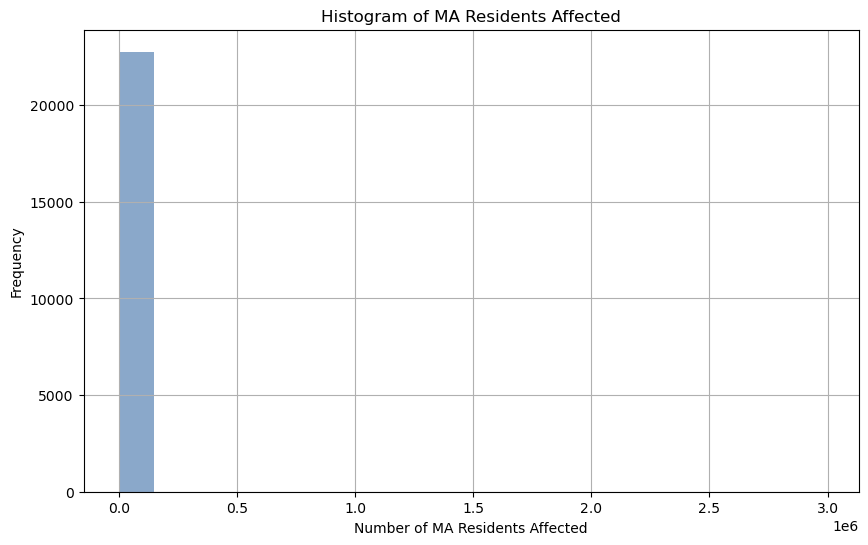

In [4]:
plt.figure(figsize=(10, 6))
plt.hist(df["MA Residents Affected"], bins=20, color="#8aa8ca")
plt.xlabel("Number of MA Residents Affected")
plt.ylabel("Frequency")
plt.title("Histogram of MA Residents Affected")
plt.grid(True)
plt.show()

### Data Cleaning

In [5]:
# Making column with dates of data breaches quantifyable
df["Date Reported To OCA"] = pd.to_datetime(df["Date Reported To OCA"])

# Replacing NaN values to "No" due to assumption confirmation by dataset source.
df["Breach Occur at the Reporting Entity?"].fillna("No", inplace=True)

# Targeted Data
df["SSNBreached"].fillna("No", inplace=True)
df["Account Number Breached"].fillna("No", inplace=True)
df["Drivers Licenses Breached"].fillna("No", inplace=True)
df["Credit Debit Numbers Breached"].fillna("No", inplace=True)

# Security info about organization
df["Provided Credit Monitoring"].fillna("No", inplace=True)
df["Data Encrypted"].fillna("No", inplace=True)
df["Mobile Device Lost Stolen"].fillna("No", inplace=True)

# Drop rows with null data in this column these were confirmed as true null values
df.dropna(subset=["Breach Type Description"], inplace=True) 
df.dropna(subset=["MA Residents Affected"], inplace=True) 

# Drop unnecessary column
df.drop(columns=["Assigned Breach Number"], inplace=True)

df["Year"] = df["Date Reported To OCA"].dt.year
df["Month"] = df["Date Reported To OCA"].dt.month
df["Day"] = df["Date Reported To OCA"].dt.day

df_state1 = df

df_state1

,Date Reported To OCA,Organization Name,Breach Type Description,Breach Occur at the Reporting Entity?,MA Residents Affected,SSNBreached,Account Number Breached,Drivers Licenses Breached,Credit Debit Numbers Breached,Provided Credit Monitoring,Data Encrypted,Mobile Device Lost Stolen,Year,Month,Day
0,2007-08-16,Hewlett Packard Company,Electronic,No,52.0,Yes,No,No,No,Yes,No,Yes,2007,8,16
1,2007-09-11,Kraft Foods,Electronic,No,460.0,Yes,No,No,No,Yes,No,Yes,2007,9,11
2,2007-09-12,The Hartford,Electronic,No,18.0,Yes,Yes,No,No,Yes,No,No,2007,9,12
3,2007-09-21,Symantec Corporation,Undefined,No,1.0,Yes,No,No,No,Yes,No,No,2007,9,21
5,2007-10-09,Daymon Worldwide Inc.,Electronic,No,1416.0,Yes,No,No,No,No,No,No,2007,10,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22989,2022-12-30,Wabtec Corporation,Electronic,Yes,7.0,Yes,No,Yes,No,Yes,No,No,2022,12,30
22990,2022-12-30,City Enterprises LLC,Electronic,Yes,9.0,Yes,Yes,Yes,No,Yes,No,No,2022,12,30
22991,2022-12-30,Adams Street Partners LLC,Electronic,No,6.0,Yes,Yes,Yes,No,Yes,No,No,2022,12,30
22992,2022-12-30,Retreat Behavioral Health,Electronic,Yes,159.0,Yes,No,No,No,Yes,No,No,2022,12,30


### Outlier Detection and Handling

In [6]:
# Detect the Outliers

# Finding IQR
Q1 = df["MA Residents Affected"].quantile(0.25)
Q3 = df["MA Residents Affected"].quantile(0.75)
IQR = Q3 - Q1

# Defining a threshold for outliers
threshold = 1.5 * IQR

# Isolating the outliers
outliers = df[(df["MA Residents Affected"] < Q1 - threshold) | (df["MA Residents Affected"] > Q3 + threshold)]

outliers

,Date Reported To OCA,Organization Name,Breach Type Description,Breach Occur at the Reporting Entity?,MA Residents Affected,SSNBreached,Account Number Breached,Drivers Licenses Breached,Credit Debit Numbers Breached,Provided Credit Monitoring,Data Encrypted,Mobile Device Lost Stolen,Year,Month,Day
0,2007-08-16,Hewlett Packard Company,Electronic,No,52.0,Yes,No,No,No,Yes,No,Yes,2007,8,16
1,2007-09-11,Kraft Foods,Electronic,No,460.0,Yes,No,No,No,Yes,No,Yes,2007,9,11
5,2007-10-09,Daymon Worldwide Inc.,Electronic,No,1416.0,Yes,No,No,No,No,No,No,2007,10,9
6,2007-10-20,Blockbuster Video,Electronic,No,86.0,No,No,Yes,Yes,No,No,Yes,2007,10,20
8,2007-10-30,New England School of Law,Electronic,No,2870.0,Yes,No,No,No,No,No,No,2007,10,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22970,2022-12-29,"Five Guys Enterprises, LLC / Five Guys Operati...",Electronic,Yes,93.0,Yes,No,Yes,No,Yes,No,No,2022,12,29
22971,2022-12-29,Entrust Corporation,Electronic,Yes,47.0,Yes,No,No,No,Yes,No,No,2022,12,29
22973,2022-12-29,"Bay Bridge Administrators, LLC",Electronic,Yes,1441.0,Yes,No,Yes,No,Yes,No,No,2022,12,29
22988,2022-12-30,L. Knife & Son,Paper,Yes,3723.0,Yes,Yes,No,No,Yes,No,No,2022,12,30


In [7]:
# Handling Outliers

# We are choosing to remove the outliers
df = df[~((df['MA Residents Affected'] < Q1 - threshold) | (df['MA Residents Affected'] > Q3 + threshold))]



# In case it is better to replace the outliers with the MA residents affected with the median value
#median_value = df['MA Residents Affected'].median()
#
#df['MA Residents Affected'] = np.where(
#    (df['MA Residents Affected'] < Q1 - threshold) | (df['MA Residents Affected'] > Q3 + threshold),
#    median_value,
#    df['MA Residents Affected']
#)

df

,Date Reported To OCA,Organization Name,Breach Type Description,Breach Occur at the Reporting Entity?,MA Residents Affected,SSNBreached,Account Number Breached,Drivers Licenses Breached,Credit Debit Numbers Breached,Provided Credit Monitoring,Data Encrypted,Mobile Device Lost Stolen,Year,Month,Day
2,2007-09-12,The Hartford,Electronic,No,18.0,Yes,Yes,No,No,Yes,No,No,2007,9,12
3,2007-09-21,Symantec Corporation,Undefined,No,1.0,Yes,No,No,No,Yes,No,No,2007,9,21
7,2007-10-26,American Academy of Pediatrics,Electronic,No,7.0,Yes,No,No,No,Yes,No,Yes,2007,10,26
10,2007-11-07,Computershare,Electronic,No,2.0,Yes,Yes,No,No,Yes,Yes,No,2007,11,7
11,2007-11-14,The Commonwealth of MA - Executive Office of E...,Paper,No,2.0,No,Yes,No,No,No,No,No,2007,11,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22987,2022-12-30,Center for Human Development,Paper,Yes,2.0,Yes,Yes,No,No,Yes,No,No,2022,12,30
22989,2022-12-30,Wabtec Corporation,Electronic,Yes,7.0,Yes,No,Yes,No,Yes,No,No,2022,12,30
22990,2022-12-30,City Enterprises LLC,Electronic,Yes,9.0,Yes,Yes,Yes,No,Yes,No,No,2022,12,30
22991,2022-12-30,Adams Street Partners LLC,Electronic,No,6.0,Yes,Yes,Yes,No,Yes,No,No,2022,12,30


### New Statistics Table!

In [8]:
# Only numerical column
numerical_columns = df[["MA Residents Affected"]]

# Calculations
minimum = numerical_columns.min()
maximum = numerical_columns.max()
mean = numerical_columns.mean()
median = numerical_columns.median()
std_deviation = numerical_columns.std()


new_stat_table = pd.DataFrame({
    'Statistic': ['Minimum', 'Maximum', 'Mean', 'Median', 'Standard Deviation'],
    "MA Residents Affected": [minimum["MA Residents Affected"], maximum["MA Residents Affected"], mean["MA Residents Affected"], median["MA Residents Affected"], std_deviation["MA Residents Affected"]]
})

new_stat_table

,Statistic,MA Residents Affected
0,Minimum,0.000000
1,Maximum,41.000000
2,Mean,5.199979
3,Median,2.000000
4,Standard Deviation,7.677132


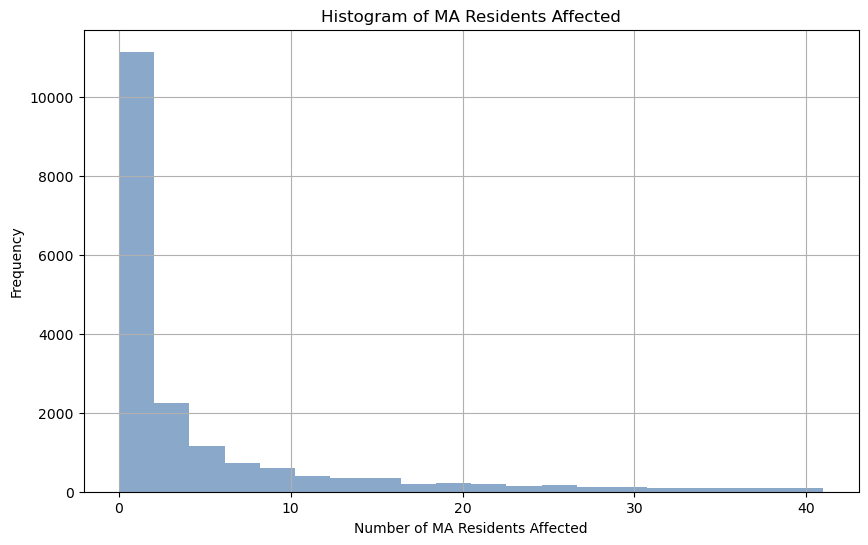

In [9]:
plt.figure(figsize=(10, 6))
plt.hist(df["MA Residents Affected"], bins=20, color="#8aa8ca")
plt.xlabel("Number of MA Residents Affected")
plt.ylabel("Frequency")
plt.title("Histogram of MA Residents Affected")
plt.grid(True)
plt.show()

### Data Transformation

In [10]:
#Categorical Encoding for Boolean columns

# If breach occured at entity
df["Breach Occur at the Reporting Entity?"] = df["Breach Occur at the Reporting Entity?"].apply(lambda x: True if x == "yes" else False)

# Targeted data
df["SSNBreached"] = df["SSNBreached"].apply(lambda x: True if x == "yes" else False)
df["Account Number Breached"] = df["Account Number Breached"].apply(lambda x: True if x == "yes" else False)
df["Drivers Licenses Breached"] = df["Drivers Licenses Breached"].apply(lambda x: True if x == "yes" else False)
df["Credit Debit Numbers Breached"] = df["Credit Debit Numbers Breached"].apply(lambda x: True if x == "yes" else False)

# Security info about organization
df["Provided Credit Monitoring"] = df["Provided Credit Monitoring"].apply(lambda x: True if x == "yes" else False)
df["Data Encrypted"] = df["Data Encrypted"].apply(lambda x: True if x == "yes" else False)
df["Mobile Device Lost Stolen"] = df["Mobile Device Lost Stolen"].apply(lambda x: True if x == "yes" else False)


In [11]:
nlp = spacy.load("en_core_web_sm")

# Define functions to categorize organization names
def categorize_organization(name):
    if pd.isna(name):
        return "Other"
    
    doc = nlp(name.lower())  # Convert to lowercase and tokenize
    categories = []

    # Defining keywords or patterns for each category
    financial_keywords = ["bank", "finance", "credit union", "financial", "capital"]
    health_keywords = ["health", "medical", "hospital", "clinic", "pharmacy"]
    llc_keywords = ["LLC"]
    corporation_keywords = ["corporation", "corp"]
    inc_keywords = ["inc", "incorporated"]
    state_institution_keywords = ["government", "state", "institution", "agency"]

    # Keyword check in organization name column
    if any(keyword in name.lower() for keyword in financial_keywords):
        categories.append("Financial")
    if any(keyword in name.lower() for keyword in health_keywords):
        categories.append("Health")
    if any(keyword in name.lower() for keyword in llc_keywords):
        categories.append("LLC")
    if any(keyword in name.lower() for keyword in corporation_keywords):
        categories.append("Corporation")
    if any(keyword in name.lower() for keyword in inc_keywords):
        categories.append("Inc")
    if any(keyword in name.lower() for keyword in state_institution_keywords):
        categories.append("State Institution")

    return ', '.join(categories) if categories else "Other"

# Using the function to make a new column which consists of categories of organizations 
# for each data breach using NLP.
df["Organization Categories"] = df["Organization Name"].apply(categorize_organization)

df

,Date Reported To OCA,Organization Name,Breach Type Description,Breach Occur at the Reporting Entity?,MA Residents Affected,SSNBreached,Account Number Breached,Drivers Licenses Breached,Credit Debit Numbers Breached,Provided Credit Monitoring,Data Encrypted,Mobile Device Lost Stolen,Year,Month,Day,Organization Categories
2,2007-09-12,The Hartford,Electronic,False,18.0,False,False,False,False,False,False,False,2007,9,12,Other
3,2007-09-21,Symantec Corporation,Undefined,False,1.0,False,False,False,False,False,False,False,2007,9,21,Corporation
7,2007-10-26,American Academy of Pediatrics,Electronic,False,7.0,False,False,False,False,False,False,False,2007,10,26,Other
10,2007-11-07,Computershare,Electronic,False,2.0,False,False,False,False,False,False,False,2007,11,7,Other
11,2007-11-14,The Commonwealth of MA - Executive Office of E...,Paper,False,2.0,False,False,False,False,False,False,False,2007,11,14,Other
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22987,2022-12-30,Center for Human Development,Paper,False,2.0,False,False,False,False,False,False,False,2022,12,30,Other
22989,2022-12-30,Wabtec Corporation,Electronic,False,7.0,False,False,False,False,False,False,False,2022,12,30,Corporation
22990,2022-12-30,City Enterprises LLC,Electronic,False,9.0,False,False,False,False,False,False,False,2022,12,30,Other
22991,2022-12-30,Adams Street Partners LLC,Electronic,False,6.0,False,False,False,False,False,False,False,2022,12,30,Other


In [12]:
#Categorical Encoding for categorical columns
cat_encoder = OneHotEncoder()

codes = cat_encoder.fit_transform(df[["Breach Type Description", "Organization Categories"]])
names = cat_encoder.get_feature_names_out()
codes_df = pd.DataFrame(codes.todense(), columns=names)
df1 = df.drop(["Breach Type Description", "Organization Categories"], axis=1)
df = pd.merge(codes_df, df1, left_index=True, right_index=True)
df.replace([0,1],[False,True], inplace=True)
df

,Breach Type Description_Both,Breach Type Description_Electronic,Breach Type Description_Paper,Breach Type Description_Undefined,Organization Categories_Corporation,"Organization Categories_Corporation, Inc","Organization Categories_Corporation, State Institution",Organization Categories_Financial,"Organization Categories_Financial, Corporation","Organization Categories_Financial, Corporation, Inc",...,SSNBreached,Account Number Breached,Drivers Licenses Breached,Credit Debit Numbers Breached,Provided Credit Monitoring,Data Encrypted,Mobile Device Lost Stolen,Year,Month,Day
2,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,2007,9,12
3,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,2007,9,21
7,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,2007,10,26
10,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,2007,11,7
11,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,2007,11,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18611,False,True,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,2021,2,True
18612,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,2021,2,True
18613,False,True,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,2021,2,True
18615,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,2021,2,True


### EDA

#### Facet plot of Target Data

<Figure size 3000x1000 with 0 Axes>

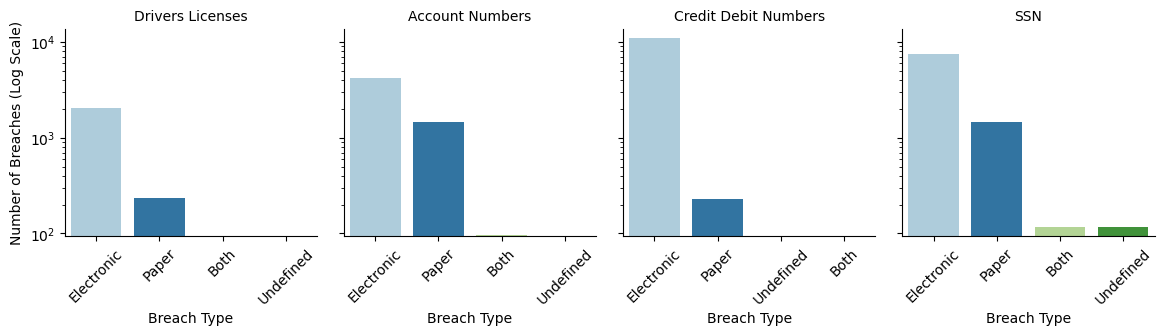

In [13]:
# Filter data for each breach type
drivers_compromised = df_state1[df_state1["Drivers Licenses Breached"] == "Yes"]
account_compromised = df_state1[df_state1["Account Number Breached"] == "Yes"]
credit_debit_compromised = df_state1[df_state1["Credit Debit Numbers Breached"] == "Yes"]
ssn_breached = df_state1[df_state1["SSNBreached"] == "Yes"]

# Count the number of breaches by breach type
drivers_counts = drivers_compromised["Breach Type Description"].value_counts()
account_counts = account_compromised["Breach Type Description"].value_counts()
credit_debit_counts = credit_debit_compromised["Breach Type Description"].value_counts()
ssn_breached_counts = ssn_breached["Breach Type Description"].value_counts()

# Combine the counts into a single DataFrame
combined_counts = pd.DataFrame({
    "Breach Type": ["Drivers Licenses"] * len(drivers_counts) +
                   ["Account Numbers"] * len(account_counts) +
                   ["Credit Debit Numbers"] * len(credit_debit_counts) +
                   ["SSN"] * len(ssn_breached_counts),
    "Breach Type Description": list(drivers_counts.index) + list(account_counts.index) + list(credit_debit_counts.index) + list(ssn_breached_counts.index),
    "Number of Breaches": list(drivers_counts) + list(account_counts) + list(credit_debit_counts) + list(ssn_breached_counts)
})

# Set the figure size to make the plots larger
plt.figure(figsize=(30, 10))  # Adjust the figure size accordingly

# Create a facet plot with shorter titles and a single line of facets
g = sns.FacetGrid(combined_counts, col="Breach Type", col_wrap=len(combined_counts["Breach Type"].unique()), sharex=False)
g.map_dataframe(sns.barplot, x="Breach Type Description", y="Number of Breaches", palette="Paired", ci=None)  # Add ci=None to remove error bars
g.set_axis_labels("Breach Type", "Number of Breaches (Log Scale)")
g.set_titles("{col_name}")
g.set(yscale="log")
g.set_xticklabels(rotation=45)

#### Distribution of Breach Occurences by Year

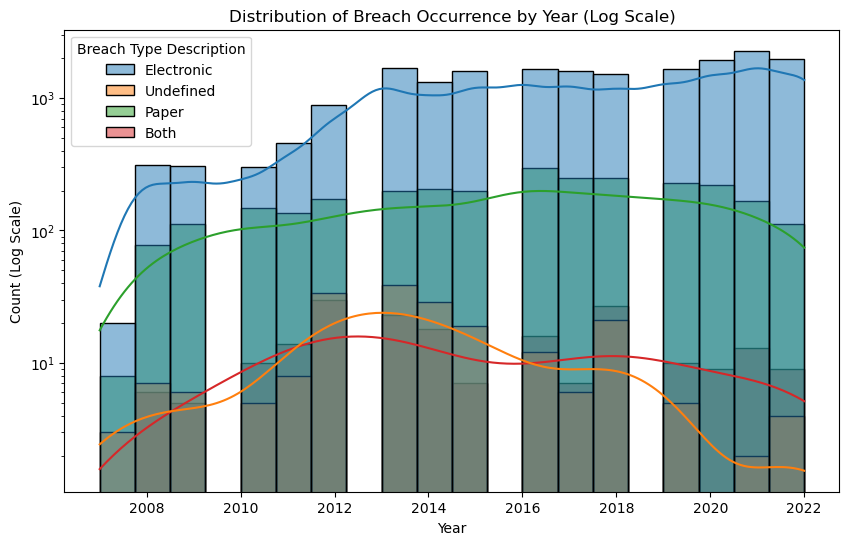

In [14]:
df_state1["Year"] = df_state1["Date Reported To OCA"].dt.year

# Create the histogram plot with a logarithmic scale on the y-axis
plt.figure(figsize=(10, 6))
sns.histplot(data=df_state1, x="Year", bins=20, kde=True, hue="Breach Type Description")
plt.yscale("log")  # Set the y-axis to logarithmic scale
plt.title("Distribution of Breach Occurrence by Year (Log Scale)")
plt.xlabel("Year")
plt.ylabel("Count (Log Scale)")
plt.show()

#### Percentage of Organization Providing Credit Monitoring

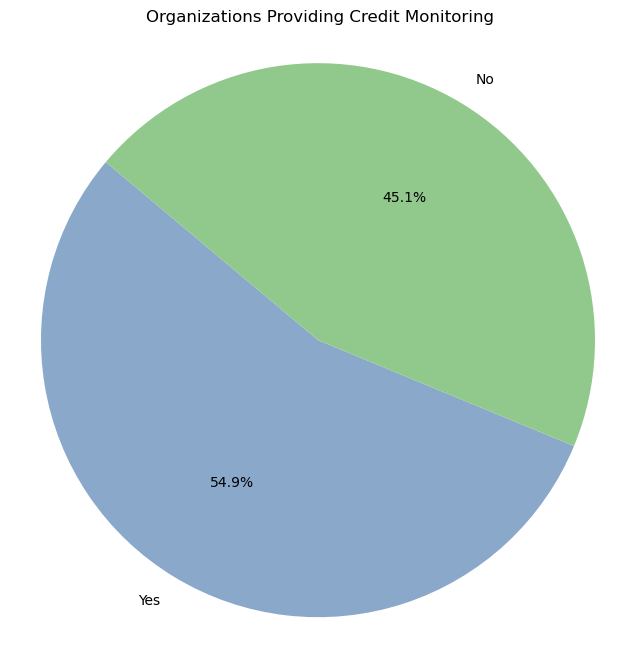

In [15]:
plt.figure(figsize=(8, 8))
colors = ["#8aa8ca", "#91c98d"]
labels = ["Yes", "No"]
sizes = df_state1["Provided Credit Monitoring"].value_counts()
plt.pie(sizes, labels=labels, autopct="%1.1f%%", startangle=140, colors=colors)
plt.title("Organizations Providing Credit Monitoring")
plt.axis("equal")
plt.show()

#### Bar Chart of Encryption Status Count

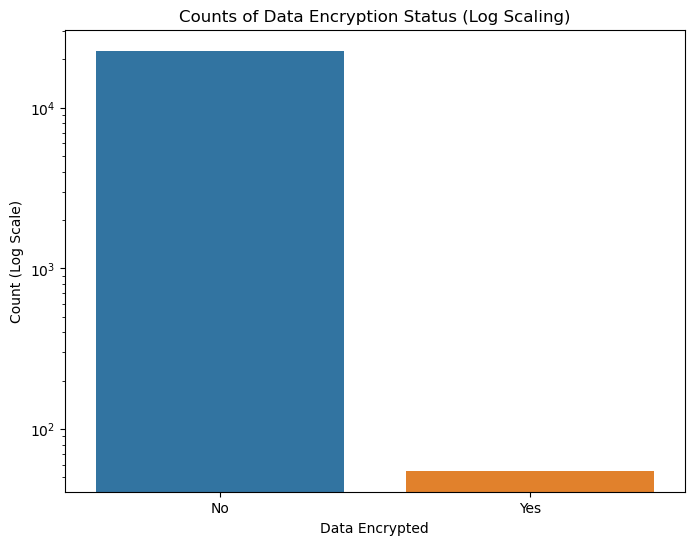

In [16]:
plt.figure(figsize=(8, 6))
ax = sns.countplot(data=df_state1, x="Data Encrypted")
plt.yscale('log') 
plt.title("Counts of Data Encryption Status (Log Scaling)")
plt.xlabel("Data Encrypted")
plt.ylabel("Count (Log Scale)") 
plt.show()

#### Bar Chart of Mobile Device Lost or Stolen

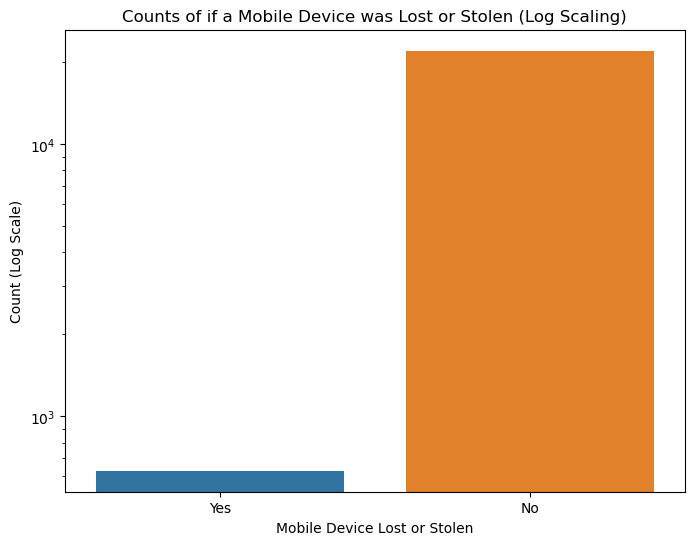

In [17]:
plt.figure(figsize=(8, 6))
ax = sns.countplot(data=df_state1, x="Mobile Device Lost Stolen")
plt.yscale('log')
plt.title("Counts of if a Mobile Device was Lost or Stolen (Log Scaling)")
plt.xlabel("Mobile Device Lost or Stolen")
plt.ylabel("Count (Log Scale)") 
plt.show()

In [18]:
df.to_csv("df1.csv")

### Modeling

In [19]:
dfm1 = df 
dfm2 = df 
dfm3 = df 

In [20]:
dfm1.drop(columns=["Date Reported To OCA"], inplace=True)

#### Model 1

In [21]:
X = dfm1.drop(columns=["Breach Occur at the Reporting Entity?", "Organization Name"])
y = dfm1["Breach Occur at the Reporting Entity?"]

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=42)

model.fit(X_train, y_train)

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


Accuracy: 1.0
Precision: 0.0
Recall: 0.0
F1-Score: 0.0
              precision    recall  f1-score   support

       False       1.00      1.00      1.00      3025

    accuracy                           1.00      3025
   macro avg       1.00      1.00      1.00      3025
weighted avg       1.00      1.00      1.00      3025

[[3025]]


#### Model 2

In [29]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Split the dataset into features (X) and the target variable (y)
X = dfm2.drop(columns=["Breach Type Description_Both", "Breach Type Description_Electronic", "Breach Type Description_Paper", "Breach Type Description_Undefined"])
y = dfm2["Breach Type Description_Both"]

# Perform one-hot encoding for categorical variables
X = pd.get_dummies(X, columns=["Organization Name"], drop_first=True)

# Split the dataset into a training set and a testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train a Random Forest classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", confusion)
print("Classification Report:\n", report)

Accuracy: 0.991404958677686
Confusion Matrix:
 [[2999    7]
 [  19    0]]
Classification Report:
               precision    recall  f1-score   support

       False       0.99      1.00      1.00      3006
        True       0.00      0.00      0.00        19

    accuracy                           0.99      3025
   macro avg       0.50      0.50      0.50      3025
weighted avg       0.99      0.99      0.99      3025



#### Model 3

In [31]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
import statsmodels.api as sm

# Define your target variable (data breaches) and features
target_variable = "Breach Type Description_Electronic"  # Adjust as needed
features = [
    "Breach Occur at the Reporting Entity?",
    "MA Residents Affected",
    "SSNBreached",
    "Account Number Breached",
    "Drivers Licenses Breached",
    "Credit Debit Numbers Breached",
    "Provided Credit Monitoring",
    "Data Encrypted",
    "Mobile Device Lost Stolen",
    "Year",
    "Month",
    "Day",
]

# Split the dataset into training and testing sets
X = dfm2[features]
y = dfm2[target_variable]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Model Accuracy:", accuracy)
print("Classification Report:\n", report)

# Interpret the model (for example, using statsmodels)
X_train = sm.add_constant(X_train)
logit_model = sm.Logit(y_train, X_train)
result = logit_model.fit()
print(result.summary())


Model Accuracy: 0.8396694214876033
Classification Report:
               precision    recall  f1-score   support

       False       0.00      0.00      0.00       485
        True       0.84      1.00      0.91      2540

    accuracy                           0.84      3025
   macro avg       0.42      0.50      0.46      3025
weighted avg       0.71      0.84      0.77      3025



ValueError: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data).